In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/balance-scale/balance-scale.data"
df = pd.read_csv(url, names=['class name','left-weight','left-distance','right-weight','right-distance'])

In [3]:
df

,class name,left-weight,left-distance,right-weight,right-distance
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5
...,...,...,...,...,...
620,L,5,5,5,1
621,L,5,5,5,2
622,L,5,5,5,3
623,L,5,5,5,4


In [4]:
feature = ['left-weight','left-distance','right-weight','right-distance']
x = df.loc[:,feature]
y = df.loc[:,'class name']

In [5]:
x = StandardScaler().fit_transform(x)

In [6]:
lda = LDA(n_components=2)
x_lda = lda.fit_transform(x, y)

In [7]:
df_lda = pd.DataFrame(data = x_lda, columns = ['LDA1', 'LDA2'])
df_lda['class name'] = y

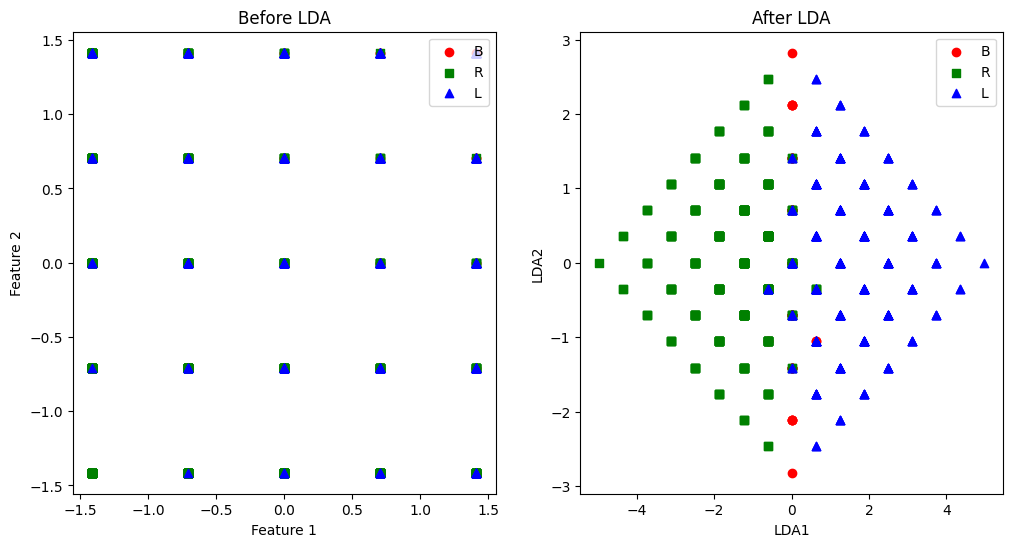

In [8]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)

for target, color, marker in zip(df['class name'].unique(), ['r', 'g', 'b'], ['o', 's', '^']):
    plt.scatter(x[y == target, 0], x[y == target, 1], c=color, marker=marker, label=target)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Before LDA')
plt.legend()

plt.subplot(1, 2, 2)

for target, color, marker in zip(df_lda['class name'].unique(), ['r', 'g', 'b'], ['o', 's', '^']):
    plt.scatter(df_lda[df_lda['class name'] == target]['LDA1'], 
                df_lda[df_lda['class name'] == target]['LDA2'], 
                c=color, marker=marker, label=target)

plt.xlabel('LDA1')
plt.ylabel('LDA2')
plt.title('After LDA')
plt.legend()

plt.show()

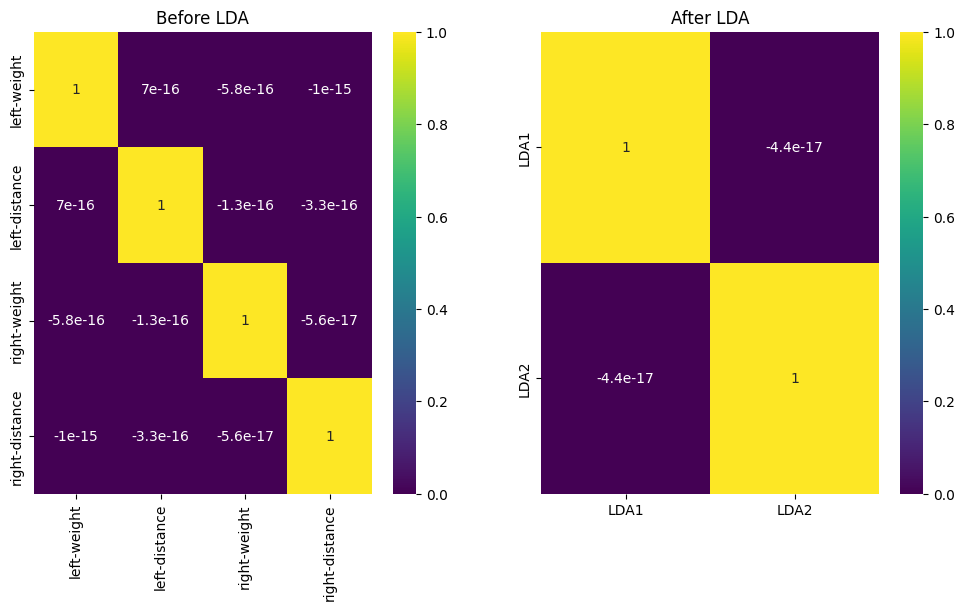

In [12]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='viridis')
plt.title('Before LDA')

df_lda = pd.DataFrame(data=x_lda, columns=['LDA1', 'LDA2'])
#df_lda['class name'] = y
plt.subplot(1, 2, 2)
sns.heatmap(df_lda.corr(numeric_only=True), annot=True, cmap='viridis')
plt.title('After LDA')

plt.show()

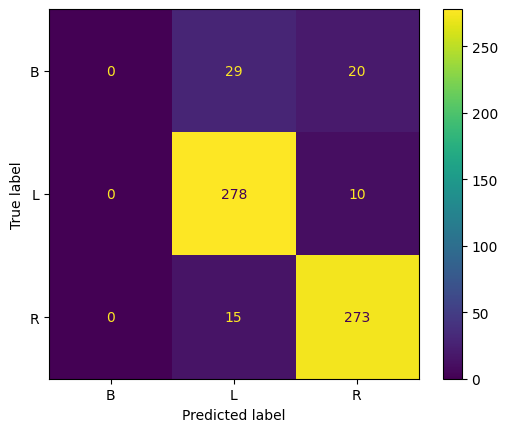

In [15]:
y_pred = lda.predict(x)  

cm = confusion_matrix(y, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lda.classes_)
disp.plot()
plt.show()

<Axes: >

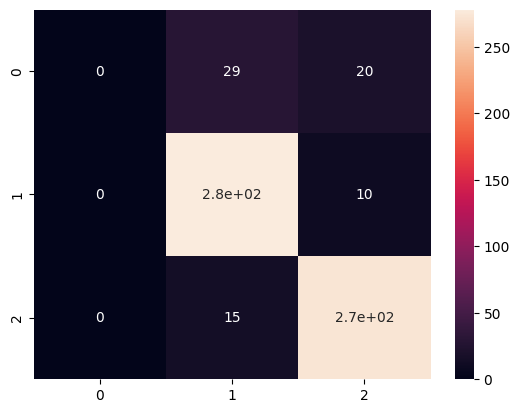

In [16]:
sns.heatmap(cm,annot=True)